In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("manufacturing_defect_dataset.csv")
df.head(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
5,171,6975.931602,95.331919,1,3.914574,92.568436,19,3.027324,7.930009,0.074069,87.079118,7,1238.994421,0.118021,7.279442,171.711804,1
6,800,15889.698650,99.325486,3,4.789000,90.729911,10,3.559561,3.046889,0.040192,91.063158,8,3138.431150,0.333913,4.891669,188.727737,1
7,120,17266.779948,99.401489,4,0.743605,92.119681,13,1.604879,8.380972,0.009702,88.705569,3,1004.108554,0.293422,9.333835,312.526896,1
8,714,8202.670495,97.301422,5,3.185856,95.172937,2,3.494920,3.668747,0.058433,94.298961,4,4150.875773,0.366683,5.517451,215.680921,1
9,221,12587.790394,92.015843,2,2.425283,97.507284,0,2.633960,5.933418,0.032955,85.316362,6,3023.891555,0.317071,5.965972,364.638176,0


## 1. DEFINE

#### A. Creating Problem Statement

In [7]:
df.dtypes

ProductionVolume          int64
ProductionCost          float64
SupplierQuality         float64
DeliveryDelay             int64
DefectRate              float64
QualityScore            float64
MaintenanceHours          int64
DowntimePercentage      float64
InventoryTurnover       float64
StockoutRate            float64
WorkerProductivity      float64
SafetyIncidents           int64
EnergyConsumption       float64
EnergyEfficiency        float64
AdditiveProcessTime     float64
AdditiveMaterialCost    float64
DefectStatus              int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [11]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


- from the dataset above there's not duplicate and missing values

In [31]:
float_cols = df.select_dtypes(include="float").columns
df[float_cols] = df[float_cols].round(2)

In [33]:
df.head(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.40,86.65,1,3.12,63.46,9,0.05,8.63,0.08,85.04,0,2419.62,0.47,5.55,236.44,1
1,535,19770.05,86.31,4,0.82,83.70,20,4.91,9.30,0.04,99.66,7,3915.57,0.12,9.08,353.96,1
2,960,19060.82,82.13,0,4.51,90.35,1,2.46,5.10,0.00,92.82,2,3392.39,0.50,6.56,396.19,1
3,370,5647.61,87.34,5,0.64,67.63,8,4.69,3.58,0.06,96.89,8,4652.40,0.18,8.10,164.14,1
4,206,7472.22,81.99,3,3.87,82.73,9,2.75,6.85,0.07,88.32,7,1581.63,0.26,6.41,365.71,1
5,171,6975.93,95.33,1,3.91,92.57,19,3.03,7.93,0.07,87.08,7,1238.99,0.12,7.28,171.71,1
6,800,15889.70,99.33,3,4.79,90.73,10,3.56,3.05,0.04,91.06,8,3138.43,0.33,4.89,188.73,1
7,120,17266.78,99.40,4,0.74,92.12,13,1.60,8.38,0.01,88.71,3,1004.11,0.29,9.33,312.53,1
8,714,8202.67,97.30,5,3.19,95.17,2,3.49,3.67,0.06,94.30,4,4150.88,0.37,5.52,215.68,1
9,221,12587.79,92.02,2,2.43,97.51,0,2.63,5.93,0.03,85.32,6,3023.89,0.32,5.97,364.64,0


##### A1. Calculating Total High Defects (Defect Status = 1) per Total Records Data 3240

In [19]:
total_records = len(df)
high_defects = df[df["DefectStatus"] == 1].shape[0]
pct_high_defects = (high_defects/total_records) * 100

print (f"Total Records: {total_records}")
print (f"High Defect Records: {high_defects}")
print (f"Percentage High Defects: {pct_high_defects:.2f}%")

Total Records: 3240
High Defect Records: 2723
Percentage High Defects: 84.04%


##### A2. Calculating Avg Defects Rate for Each of Defect Status

In [22]:
# Calculating Avg of DefectRate per DefectStatus 
avg_defect_rate = df.groupby('DefectStatus')['DefectRate'].mean().reset_index()
avg_defect_rate['Status_Label'] = avg_defect_rate['DefectStatus'].map({0: 'Low Defects', 1: 'High Defects'})
print(avg_defect_rate.round(2))

   DefectStatus  DefectRate  Status_Label
0             0        2.01   Low Defects
1             1        2.89  High Defects


- based on data baseline, current average defect rate for high-defect processes is 2.89%. The goal of this CI project is to reduce it to ≤ 2% to improve product quality and reduce associated cost

##### A3. Calculating Avg Production Cost for Each of Defect Status 

In [26]:
# Calculating Avg of Prod Cost per DefectStatus 
avg_prod_cost = df.groupby('DefectStatus')['ProductionCost'].mean().reset_index()
avg_prod_cost['Status_Label'] = avg_prod_cost['DefectStatus'].map({0: 'Low Defects', 1: 'High Defects'})
print(avg_prod_cost.round(2))

   DefectStatus  ProductionCost  Status_Label
0             0        12158.88   Low Defects
1             1        12473.17  High Defects


A4. Calculating Avg Quality Score for Each of Defect Status

In [29]:
# Calculating Avg of Quality Score per DefectStatus 
avg_quality_score = df.groupby('DefectStatus')['QualityScore'].mean().reset_index()
avg_quality_score['Status_Label'] = avg_quality_score['DefectStatus'].map({0: 'Low Defects', 1: 'High Defects'})
print(avg_quality_score)

   DefectStatus  QualityScore  Status_Label
0             0     85.442375   Low Defects
1             1     79.126454  High Defects


#### Problem Statement
During Q2 2024, the manufacturing process recorded a total of 3,240 production instances. Among them, 2,723 (84.0%) were classified as high defect occurrences with quality score average < 80%, significantly exceeding the acceptable target of 10% and quality score >= 85%. Preliminary analysis indicates that factors such as supplier quality, delivery delays, maintenance hours, and worker productivity may be driving these elevated defect rates.

Each high-defect instance is associated with an estimated average production cost of $12,500 per batch, representing a substantial opportunity for cost reduction if defects are mitigated.

This project aims to gradually reduce the defect rate by identifying and addressing the main root causes using the DMAIC framework, with an incremental improvement approach toward the target defect rate of 10%.

#### Objective Statements

The goal of this project: Identify and mitigate the main root causes of high defect occurences in the manufacturing process during Q2 2024, aiming to gradually reduce the dect rate from 84% toward the acceptable target of 10%.
Measurable Target:
1. Identify key factors of defects occurence
2. Achieve an initial 10-15% reduction in defect rate and 5-10% quality score within the first qurater of improvement initiatives
3. Reduce average production cost per defective batch by $1.500 - $2.000 within the same period

#### Scope vs Scope Creep

SCOPE

Focus: Factors directly affecting high defect rates in Q2 2024 manufacturing data
Include:
- Supplier quality
- Delivery delays
- Maintenance Hours
- workforce productivity

SCOPE CREEP
- Energy consumption unrelated to defects
- Production costs not tied to defects
- External supplier logistics beyond delivery delays
- Product-specific issues outside the process
Any unrelated issues discovered should be noted for future projects, do not attempt to fix them now to avoid scope creep

#### B. Creating Critical to Quality Metrics (CTQ)

Customer Need (VOC) : Reduce high defect rate in manufacturing processes during Q2 2024
CTQ Metrics:
1. Driver : Supplier Quality | CTQ Metrics : Supplier Quality (% target high)

2. Driver : Delivery Delays | CTQ Metrics : Delivery Delay (days, target low)
   
3. Driver : Machine Conditions | CTQ Metrics : Machine Maintenance (hours/week, target optimal)

4. Driver : Workforce Productivity | CTQ Metrics : WorkerProductivity (%, target high)

## 2. MEASURE

In [31]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


#### A. Baseline Metrics for Key Factors

##### A1. Calculating Average and Std for Key Factors

In [35]:
factors = ['SupplierQuality','DeliveryDelay', 'MaintenanceHours','WorkerProductivity']

# Loop each factor
for factor in factors:
    temp = df.groupby('DefectStatus')[factor].agg(['mean','std']).reset_index()
    temp['Status_Label'] = temp['DefectStatus'].map({0:'Low Defects', 1:'High Defects'})
    temp = temp.round(2)
    print(f"=== {factor} ===")
    print(temp)
    print("\n")

=== SupplierQuality ===
   DefectStatus   mean   std  Status_Label
0             0  89.33  5.79   Low Defects
1             1  89.93  5.75  High Defects


=== DeliveryDelay ===
   DefectStatus  mean   std  Status_Label
0             0  2.54  1.69   Low Defects
1             1  2.56  1.71  High Defects


=== MaintenanceHours ===
   DefectStatus   mean   std  Status_Label
0             0   6.79  5.10   Low Defects
1             1  12.37  6.81  High Defects


=== WorkerProductivity ===
   DefectStatus   mean   std  Status_Label
0             0  90.11  5.72   Low Defects
1             1  90.03  5.73  High Defects




##### A2. Calculating Sigma Level

In [37]:
from scipy.stats import norm

total_items = len(df)
good_units = df[df["DefectStatus"] == 0].shape[0]
defects = total_items - good_units

yield_rate = round(good_units / total_items * 100,2)

dpmo = (defects / total_items) * 1_000_000
dpmo = round(dpmo, 2)

# Calculate Sigma Level (with 1.5 shift) 
sigma_level = norm.ppf(yield_rate/100) + 1.5
sigma_level = round(sigma_level, 2)

print(f"Total units: {total_items}")
print(f"Good units: {good_units}")
print(f"Defective units: {defects}")
print(f"Yield rate: {yield_rate}%")
print(f"DPMO: {dpmo}")
print(f"Sigma level: {sigma_level}")

Total units: 3240
Good units: 517
Defective units: 2723
Yield rate: 15.96%
DPMO: 840432.1
Sigma level: 0.5


##### A3. Calculating the Distribution of Data

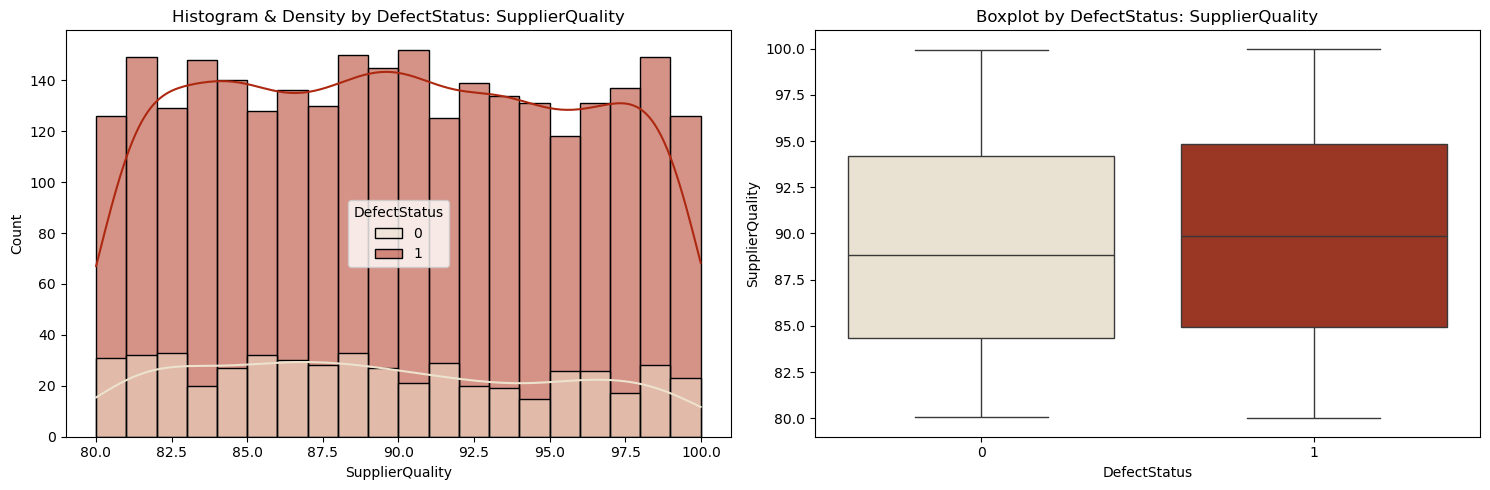

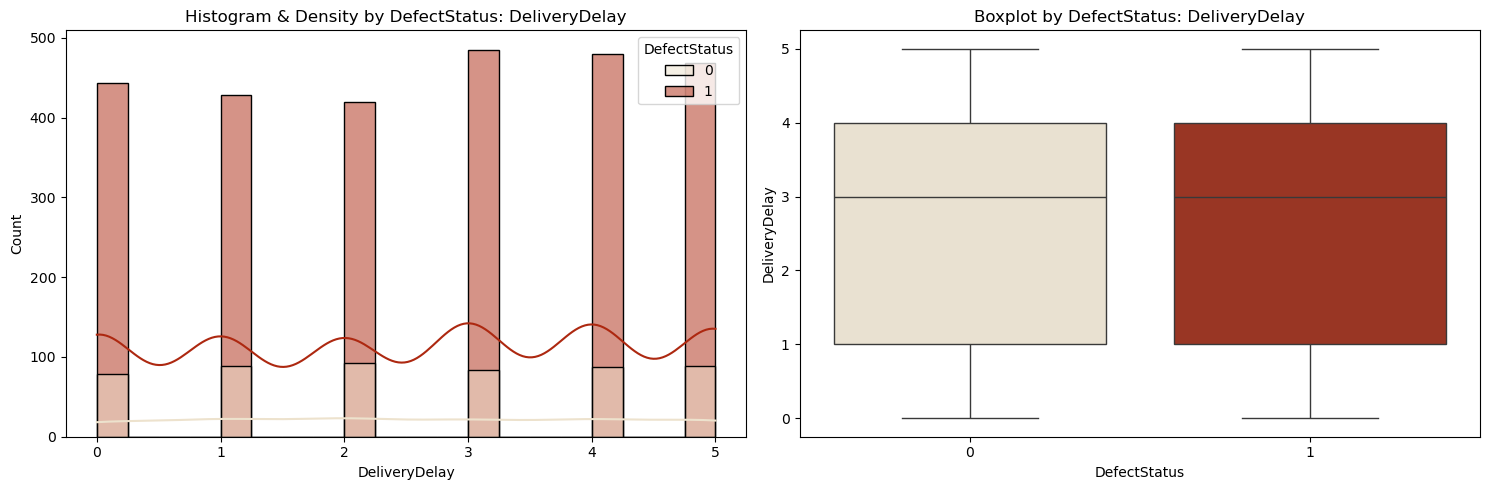

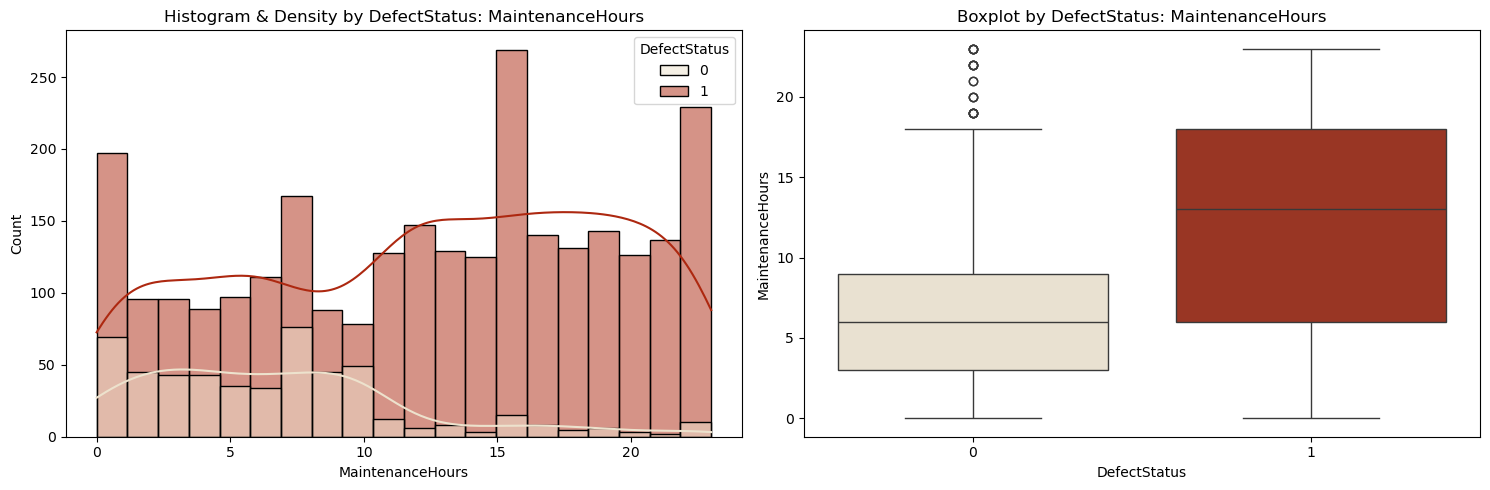

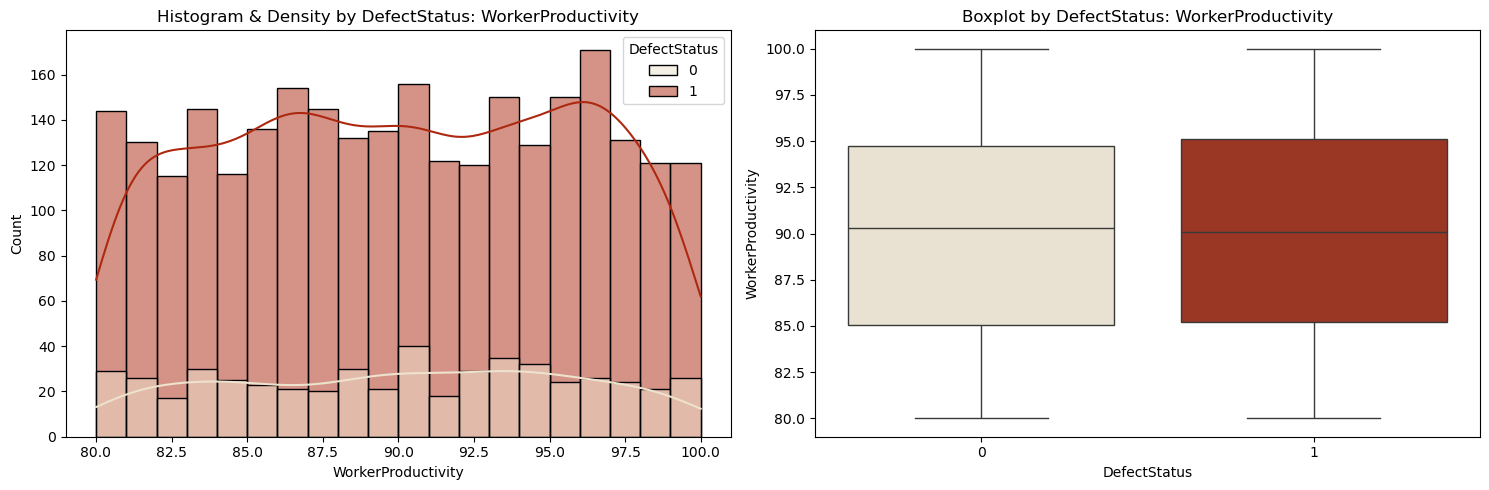

In [40]:
for col in factors:
    plt.figure(figsize=(15,5))
    
    # Histogram & Density per DefectStatus
    plt.subplot(1,2,1)
    sns.histplot(
        data=df, x=col, hue='DefectStatus', bins=20, kde=True,
        palette=['#EDE2CD', '#AD2810'], alpha=0.5
    )
    plt.title(f'Histogram & Density by DefectStatus: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot per DefectStatus 
    plt.subplot(1,2,2)
    sns.boxplot(
        x='DefectStatus', y=col, data=df, hue='DefectStatus',
        palette=['#EDE2CD', '#AD2810'], legend=False
    )
    plt.title(f'Boxplot by DefectStatus: {col}')
    plt.xlabel('DefectStatus')
    plt.ylabel(col)
    plt.legend([],[], frameon=False) 
    
    plt.tight_layout()
    plt.show()

##### A4. Calculating the Correlation of Key Factors vs Target (Defect Status)

In [42]:
target = 'DefectStatus' 
corr_with_target = df[factors + [target]].corr()[target].drop(target)
print(corr_with_target)

SupplierQuality       0.038184
DeliveryDelay         0.005425
MaintenanceHours      0.297107
WorkerProductivity   -0.005224
Name: DefectStatus, dtype: float64


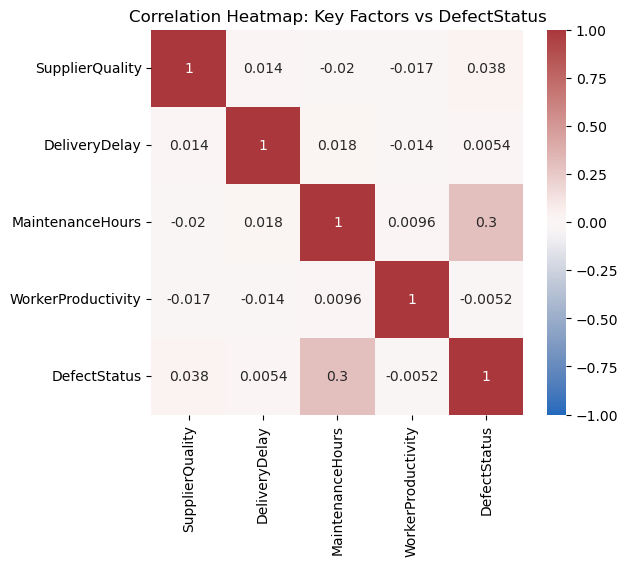

In [44]:
corr_data = df[factors + [target]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_data, annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Key Factors vs DefectStatus")
plt.show()

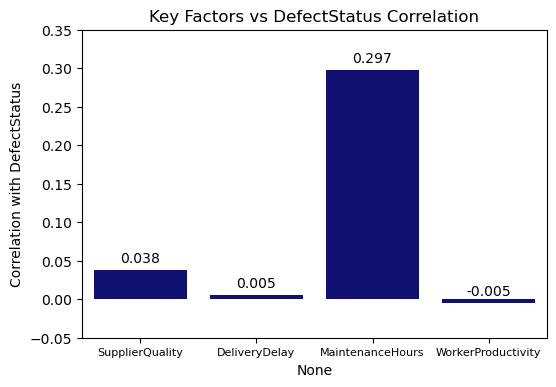

In [193]:
# Barplot
plt.figure(figsize=(6,4))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, color='navy')
plt.ylabel('Correlation with DefectStatus')
plt.title('Key Factors vs DefectStatus Correlation')
plt.ylim(-0.05, 0.35)
plt.xticks(fontsize=8)
for i, v in enumerate(corr_with_target.values):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()

## 3. Analyze

##### A. Pareto Chart

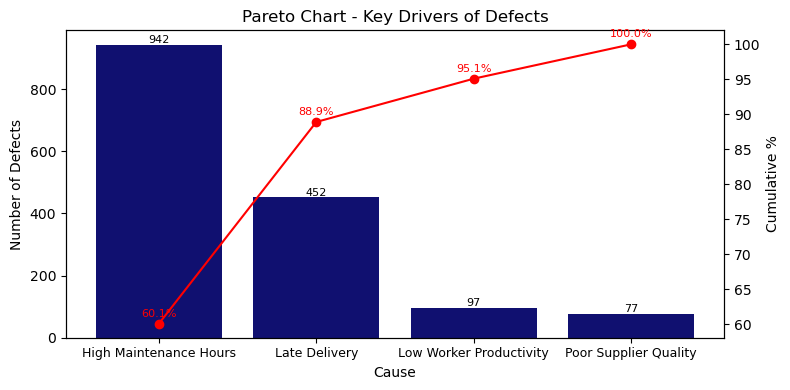

In [29]:
# Definisikan catefories for root cause
df['Cause'] = np.select(
    [
        df['SupplierQuality'] < 80.65,
        df['DeliveryDelay'] > 4.00,
        df['MaintenanceHours'] > 14.44,
        df['WorkerProductivity'] < 81.53
    ],
    [
        'Poor Supplier Quality',
        'Late Delivery',
        'High Maintenance Hours',
        'Low Worker Productivity'
    ],
    default='Other'
)

# Create Pareto Chart for DefectStatus = 1
pareto_data = (
    df[(df['DefectStatus'] == 1) & (df['Cause'] != 'Other')]
    ['Cause']
    .value_counts().reset_index()
)
pareto_data.columns = ['Cause', 'DefectCount']
pareto_data['Cumulative %'] = pareto_data['DefectCount'].cumsum() / pareto_data['DefectCount'].sum() * 100

# Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(8,4))

# Barplot
sns.barplot(data=pareto_data, x='Cause', y='DefectCount', color='navy', ax=ax1)


for i, v in enumerate(pareto_data['DefectCount']):
    ax1.text(i, v + 5, str(v), ha='center', fontsize=8)
ax2 = ax1.twinx()
ax2.plot(pareto_data['Cause'], pareto_data['Cumulative %'], color='red', marker='o')


for i, v in enumerate(pareto_data['Cumulative %']):
    ax2.text(i, v + 1, f"{v:.1f}%", color='red', ha='center', fontsize=8)

ax1.set_ylabel('Number of Defects')
ax2.set_ylabel('Cumulative %')
plt.title('Pareto Chart - Key Drivers of Defects')
ax1.set_xticks(range(len(pareto_data['Cause'])))
ax1.set_xticklabels(pareto_data['Cause'], rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [110]:
df.columns

Index(['ProductionVolume', 'ProductionCost', 'SupplierQuality',
       'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours',
       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
       'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost',
       'DefectStatus'],
      dtype='object')

- ['SupplierQuality'] < 80.65, >> 89.33 - 1.5(std=5.79)
- ['DeliveryDelay'] > 4.00, >> quantil (0.75)
- ['MaintenanceHours'] > 14.44, >> 6.79 + 1.5(std=5.10)
- ['WorkerProductivity'] < 81.53, >> 90.11 - 1.5(std=5.72)

##### B. Hypothesis Testing for Maintenance Hours

In [51]:
from scipy.stats import shapiro, mannwhitneyu

group_low = df[df['DefectStatus'] == 0]['MaintenanceHours']
group_high = df[df['DefectStatus'] == 1]['MaintenanceHours']

# 1. Normality test
stat_low, p_low = shapiro(group_low)
stat_high, p_high = shapiro(group_high)
print(f"Low Defects normality p-value: {p_low:.4f}")
print(f"High Defects normality p-value: {p_high:.4f}")

# 2. Decision
if p_low > 0.05 and p_high > 0.05:
    print("Data normal → t-test bisa digunakan")
else:
    print("Data tidak normal → gunakan Mann-Whitney U test")

Low Defects normality p-value: 0.0000
High Defects normality p-value: 0.0000
Data tidak normal → gunakan Mann-Whitney U test


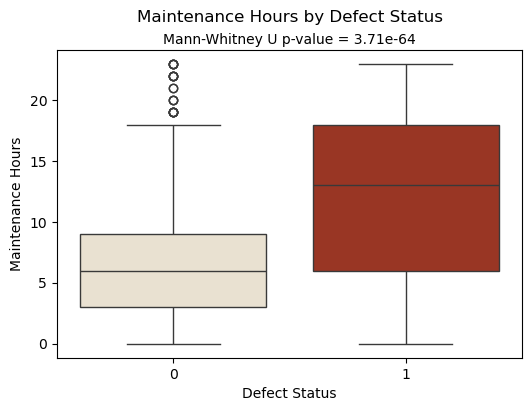

In [57]:
# Calculate Mann-Whitney U test
u_stat, p_val = mannwhitneyu(group_low, group_high)

plt.figure(figsize=(6,4))

# Boxplot 
sns.boxplot(x='DefectStatus', y='MaintenanceHours', hue='DefectStatus', data=df, palette=['#EDE2CD', '#AD2810'], legend=False)
plt.title('Maintenance Hours by Defect Status', fontsize=12, pad=20)
y_max = df['MaintenanceHours'].max()
plt.text(0.5, y_max*1.07, f'Mann-Whitney U p-value = {p_val:.2e}', 
         ha='center', fontsize=10)

plt.ylabel('Maintenance Hours')
plt.xlabel('Defect Status')
plt.show()

Finding:
Higher maintenance hours are likely associated with high defect status. This aligns with earlier analyses using Pareto charts and correlation, which also pointed to maintenance hours as an important factor.

Conclusion:
- The Mann-Whitney U test does not assume normality, so it’s appropriate since the maintenance hours data are not normally distributed.
- The test provides statistical evidence that maintenance hours is a significant factor in defects, supporting its prioritization as a potential root cause.

In [52]:
from scipy.stats import shapiro, mannwhitneyu

group_low1 = df[df['DefectStatus'] == 0]['DeliveryDelay']
group_high1 = df[df['DefectStatus'] == 1]['DeliveryDelay']

# 1. Normality test
stat_low, p_low = shapiro(group_low1)
stat_high, p_high = shapiro(group_high1)
print(f"Low Defects normality p-value: {p_low:.4f}")
print(f"High Defects normality p-value: {p_high:.4f}")

# 2. Decision
if p_low > 0.05 and p_high > 0.05:
    print("Data normal → t-test bisa digunakan")
else:
    print("Data tidak normal → gunakan Mann-Whitney U test")

Low Defects normality p-value: 0.0000
High Defects normality p-value: 0.0000
Data tidak normal → gunakan Mann-Whitney U test


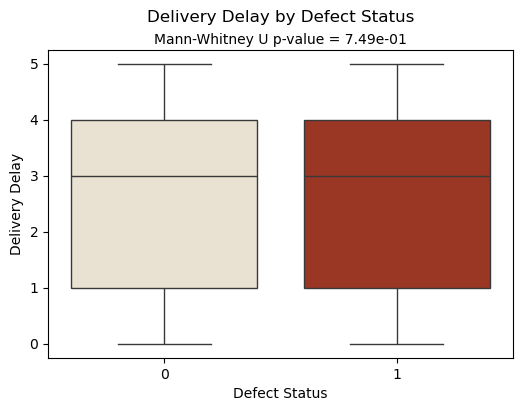

In [68]:
# Calculate Mann-Whitney U test
u_stat, p_val = mannwhitneyu(group_low1, group_high1)

plt.figure(figsize=(6,4))

# Boxplot 
sns.boxplot(x='DefectStatus', y='DeliveryDelay', hue='DefectStatus', data=df, palette=['#EDE2CD', '#AD2810'], legend=False)
plt.title('Delivery Delay by Defect Status', fontsize=12, pad=20)
y_max = df['DeliveryDelay'].max()
plt.text(0.5, y_max*1.07, f'Mann-Whitney U p-value = {p_val:.2e}', 
         ha='center', fontsize=10)

plt.ylabel('Delivery Delay')
plt.xlabel('Defect Status')
plt.show()

Finding: No statistically significant difference in DeliveryDelay between low and high defect status.

##### C. Logistic Regression

In [83]:
import statsmodels.api as sm

# Predictor & target
X = df[['MaintenanceHours']]
y = df['DefectStatus']

# Intercept
X = sm.add_constant(X)

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary
print(result.summary())

# Odds ratio
odds_ratio = np.exp(result.params)
print("\nOdds Ratio:\n", odds_ratio)

Optimization terminated successfully.
         Current function value: 0.392174
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           DefectStatus   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3238
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Oct 2025   Pseudo R-squ.:                  0.1066
Time:                        14:01:05   Log-Likelihood:                -1270.6
converged:                       True   LL-Null:                       -1422.2
Covariance Type:            nonrobust   LLR p-value:                 6.874e-68
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4008      0.082      4.909      0.000       0.241       0.561
Maintenance

In [33]:
import statsmodels.api as sm

# Predictor & target
X1 = df[['DeliveryDelay']]
y1 = df['DefectStatus']

# Intercept
X1 = sm.add_constant(X1)

# Logistic Regression
logit_model = sm.Logit(y1, X1)
result1 = logit_model.fit()

# Summary
print(result1.summary())

# Odds ratio
odds_ratio1 = np.exp(result1.params)
print("\nOdds Ratio:\n", odds_ratio1)

Optimization terminated successfully.
         Current function value: 0.438938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           DefectStatus   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3238
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:               3.351e-05
Time:                        09:42:39   Log-Likelihood:                -1422.2
converged:                       True   LL-Null:                       -1422.2
Covariance Type:            nonrobust   LLR p-value:                    0.7575
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6393      0.086     19.043      0.000       1.471       1.808
DeliveryDelay     0.

In [35]:
import statsmodels.api as sm

# Predictor & target
X2 = df[['SupplierQuality']]
y2 = df['DefectStatus']

# Intercept
X2 = sm.add_constant(X2)

# Logistic Regression
logit_model = sm.Logit(y2, X2)
result2 = logit_model.fit()

# Summary
print(result2.summary())

# Odds ratio
odds_ratio2 = np.exp(result2.params)
print("\nOdds Ratio:\n", odds_ratio2)

Optimization terminated successfully.
         Current function value: 0.438222
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           DefectStatus   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3238
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                0.001664
Time:                        09:42:42   Log-Likelihood:                -1419.8
converged:                       True   LL-Null:                       -1422.2
Covariance Type:            nonrobust   LLR p-value:                   0.02957
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0325      0.750      0.043      0.965      -1.438       1.502
SupplierQualit

In [37]:
import statsmodels.api as sm

# Predictor & target
X3 = df[['WorkerProductivity']]
y3 = df['DefectStatus']

# Tambahkan intercept (bias)
X3 = sm.add_constant(X3)

# Logistic Regression
logit_model = sm.Logit(y3, X3)
result3 = logit_model.fit()

# Summary
print(result3.summary())

# Odds ratio
odds_ratio3 = np.exp(result3.params)
print("\nOdds Ratio:\n", odds_ratio3)

Optimization terminated successfully.
         Current function value: 0.438939
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           DefectStatus   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3238
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:               3.109e-05
Time:                        09:42:43   Log-Likelihood:                -1422.2
converged:                       True   LL-Null:                       -1422.2
Covariance Type:            nonrobust   LLR p-value:                    0.7662
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8860      0.757      2.492      0.013       0.402       3.370
Worke

Finding: 
based on Logistic Regression Model,
- Maintenance Hours is a significant factor for defect status.
- Each additional 1 hour of Maintenance Hours → increases the defects
- other key factors doesn't show any significancy to the target

## 4. Improve

We set the Maintenance Hours for Low Defects = 4hrs and High Defect = 8 hrs.

In [86]:
df_improved_01 = df.copy()

# 1️⃣ for DefectStatus = 1, MaintenanceHours > 8 → set to 8
df_improved_01.loc[
    (df_improved_01['DefectStatus'] == 1) & (df_improved_01['MaintenanceHours'] > 8),
    'MaintenanceHours'
] = 8

# 2️⃣ for DefectStatus = 0, MaintenanceHours > 4 → set to 4
df_improved_01.loc[
    (df_improved_01['DefectStatus'] == 0) & (df_improved_01['MaintenanceHours'] > 4),
    'MaintenanceHours'
] = 4

In [75]:
df_improved_01.round(2)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus,Prob_Before
0,202,13175.40,86.65,1,3.12,63.46,8,0.05,8.63,0.08,85.04,0,2419.62,0.47,5.55,236.44,1,0.83
1,535,19770.05,86.31,4,0.82,83.70,8,4.91,9.30,0.04,99.66,7,3915.57,0.12,9.08,353.96,1,0.96
2,960,19060.82,82.13,0,4.51,90.35,1,2.46,5.10,0.00,92.82,2,3392.39,0.50,6.56,396.19,1,0.63
3,370,5647.61,87.34,5,0.64,67.63,8,4.69,3.58,0.06,96.89,8,4652.40,0.18,8.10,164.14,1,0.81
4,206,7472.22,81.99,3,3.87,82.73,8,2.75,6.85,0.07,88.32,7,1581.63,0.26,6.41,365.71,1,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,762,11325.69,89.25,2,2.67,87.14,4,0.99,3.57,0.07,95.92,3,3288.04,0.42,4.73,299.83,0,0.93
3236,335,5598.84,95.70,4,0.75,95.56,4,0.18,8.30,0.10,87.78,8,2761.30,0.13,7.23,245.52,0,0.87
3237,835,11736.18,96.43,5,4.90,77.97,0,4.87,3.84,0.01,81.59,5,2000.62,0.33,5.44,206.49,1,0.60
3238,302,13664.20,91.09,1,4.06,95.76,4,0.07,2.78,0.04,88.49,6,1534.79,0.22,3.78,203.77,0,0.77


In [77]:
df_improved_01.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus,Prob_Before
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,6.165741,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,2.567279,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261,0.112605
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000,0.598878
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,4.000000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000,0.762670
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,8.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000,0.881053
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,8.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000,0.935221
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,8.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000,0.969840


In [79]:
before_01 = df.groupby('DefectStatus')['MaintenanceHours'].mean().rename('Before')
after_01 = df_improved_01.groupby('DefectStatus')['MaintenanceHours'].mean().rename('After')

comparison_01 = pd.concat([before_01, after_01], axis=1)
comparison_01['Improvement'] = comparison_01['Before'] - comparison_01['After']
comparison_01.round(2)

,Before,After,Improvement
DefectStatus,,,
0,6.79,3.27,3.52
1,12.37,6.72,5.65


In [81]:
group_low_new_01 = df_improved_01[df_improved_01['DefectStatus'] == 0]['MaintenanceHours']
group_high_new_01 = df_improved_01[df_improved_01['DefectStatus'] == 1]['MaintenanceHours']

# Uji Mann-Whitney ulang
u_stat_new, p_val_new = mannwhitneyu(group_low_new_01, group_high_new_01)
print(f"After Improvement → Mann-Whitney U p-value: {p_val_new:.4f}")

After Improvement → Mann-Whitney U p-value: 0.0000


In [83]:
import statsmodels.api as sm

# Predictor & target
X5 = df_improved_01[['MaintenanceHours']]
y5 = df_improved_01['DefectStatus']

# Intercept
X5 = sm.add_constant(X5)

# Logistic Regression
logit_model5 = sm.Logit(y5, X5)
result5 = logit_model5.fit()

# Summary
print(result5.summary())

# Odds ratio
odds_ratio5 = np.exp(result5.params)
print("\nOdds Ratio:\n", odds_ratio5)

Optimization terminated successfully.
         Current function value: 0.330778
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           DefectStatus   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3238
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                  0.2464
Time:                        10:27:41   Log-Likelihood:                -1071.7
converged:                       True   LL-Null:                       -1422.2
Covariance Type:            nonrobust   LLR p-value:                1.836e-154
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8223      0.103     -7.946      0.000      -1.025      -0.619
Maintenance

A. Defects Probability Before-After

In [95]:
# Probabilities Prediction Before-After per DefectStatus
df['Prob_Before'] = result.predict(sm.add_constant(df[['MaintenanceHours']]))
X_after = sm.add_constant(df_improved_01[['MaintenanceHours']])
df_improved_01['Prob_After'] = result.predict(X_after)

before_group = df.groupby('DefectStatus')['Prob_Before'].mean()
after_group = df_improved_01.groupby('DefectStatus')['Prob_After'].mean()

comparison_group = pd.concat([before_group, after_group], axis=1)
comparison_group.columns = ['Before_Prob', 'After_Prob']
comparison_group['Reduction_%'] = (comparison_group['Before_Prob'] - comparison_group['After_Prob']) / comparison_group['Before_Prob'] * 100
comparison_group.round(2)

,Before_Prob,After_Prob,Reduction_%
DefectStatus,,,
0,0.77,0.70,9.15
1,0.85,0.78,8.62


In [99]:
# Overall probabilities
overall_before = df['Prob_Before'].mean()
overall_after = df_improved_01['Prob_After'].mean()
overall_reduction = (overall_before - overall_after) / overall_before * 100

comparison_overall = pd.DataFrame({
    'Before_Prob': [overall_before],
    'After_Prob': [overall_after],
    'Reduction_%': [overall_reduction]
}).round(2)

print(comparison_overall)

   Before_Prob  After_Prob  Reduction_%
0         0.84        0.77          8.7


B. Quality Score Before-After

In [94]:
# Fit logistic regression model: DefectStatus ~ MaintenanceHours
X = sm.add_constant(df[['MaintenanceHours']])
y = df['DefectStatus']
logit_model = sm.Logit(y, X).fit(disp=False)  # disp=False untuk suppress output

# Probabilities Before
df['Prob_Before'] = logit_model.predict(sm.add_constant(df[['MaintenanceHours']]))

# Probabilities After
X_after = sm.add_constant(df_improved_01[['MaintenanceHours']])
df_improved_01['Prob_After'] = logit_model.predict(X_after)

# Average Quality Score per DefectStatus
qs_0 = df[df['DefectStatus']==0]['QualityScore'].mean()
qs_1 = df[df['DefectStatus']==1]['QualityScore'].mean()

# Expected QualityScore
df_improved_01['Expected_QS'] = (1 - df_improved_01['Prob_After'])*qs_0 + df_improved_01['Prob_After']*qs_1

# Comparison of Expected QualityScore with Before-After
expected_before = (1 - df['Prob_Before'])*qs_0 + df['Prob_Before']*qs_1
df['Expected_QS_Before'] = expected_before

# Average
avg_before = df['Expected_QS_Before'].mean()
avg_after = df_improved_01['Expected_QS'].mean()
improvement = avg_after - avg_before

print(f"Average QualityScore before: {avg_before:.2f}")
print(f"Average QualityScore after: {avg_after:.2f}")
print(f"Expected improvement: {improvement:.2f}")

comparison_group = df_improved_01.groupby('DefectStatus')['Expected_QS'].mean().reset_index()
comparison_group.columns = ['DefectStatus', 'Expected_QS_After']

Average QualityScore before: 80.13
Average QualityScore after: 80.60
Expected improvement: 0.46


C. Probability Saving Cost Before - After

In [107]:
cost_0 = df[df['DefectStatus']==0]['ProductionCost'].mean()  # Low Defect
cost_1 = df[df['DefectStatus']==1]['ProductionCost'].mean()  # High Defect

# Probabilities After
df_improved_01['Expected_Cost'] = (1 - df_improved_01['Prob_After'])*cost_0 + df_improved_01['Prob_After']*cost_1

df['Cost_Before'] = (1 - df['Prob_Before'])*cost_0 + df['Prob_Before']*cost_1

avg_cost_before = df['Cost_Before'].mean()
avg_cost_after = df_improved_01['Expected_Cost'].mean()
saving = avg_cost_before - avg_cost_after

print(f"Average Production Cost Before: ${avg_cost_before:.2f}")
print(f"Average Production Cost After: ${avg_cost_after:.2f}")
print(f"Expected Cost Saving: ${saving:.2f} per batch or ${saving * 3240:.2f} in total production")

comparison_cost = df_improved_01.groupby('DefectStatus')['Expected_Cost'].mean().reset_index()
comparison_cost.columns = ['DefectStatus', 'Expected_Cost_After']

Average Production Cost Before: $12423.02
Average Production Cost After: $12400.05
Expected Cost Saving: $22.97 per batch or $74426.10 in total production


## 5. CONTROL

In [138]:
USL = 2.0  # percentage`

# Calculate mean & std per DefectStatus
df_stats = df.groupby('DefectStatus')['DefectRate'].agg(['mean','std']).reset_index()
df_stats['SigmaLevel'] = (USL - df_stats['mean']) / df_stats['std']

df_stats['Status_Label'] = df_stats['DefectStatus'].map({0:'Low Defects',1:'High Defects'})
df_stats = df_stats.round(2)
print(df_stats)

   DefectStatus  mean   std  SigmaLevel  Status_Label
0             0  2.01  1.00       -0.01   Low Defects
1             1  2.89  1.31       -0.68  High Defects


In [135]:
# Simulation new DefectStatus 
np.random.seed(42)  
df_improved_01['DefectStatus_Sim'] = np.random.binomial(1, df_improved_01['Prob_After'])

# Calculate DefectRate per cycle production
df_improved_01['DefectRate_Sim'] = df_improved_01['DefectStatus_Sim']

# Calculate Hitung mean & std per DefectStatus
df_stats_sim = df_improved_01.groupby('DefectStatus')['DefectRate_Sim'].agg(['mean','std']).reset_index()
USL = 2.0
df_stats_sim['SigmaLevel'] = (USL - df_stats_sim['mean']) / df_stats_sim['std']
df_stats_sim['Status_Label'] = df_stats_sim['DefectStatus'].map({0:'Low Defects', 1:'High Defects'})
df_stats_sim = df_stats_sim.round(2)
print(df_stats_sim)

   DefectStatus  mean   std  SigmaLevel  Status_Label
0             0  0.74  0.44        2.87   Low Defects
1             1  0.77  0.42        2.93  High Defects
